In [2]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import RidgeCV
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [3]:
df = pd.read_csv('housing.csv', index_col=0)

In [4]:
df.head()

,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
longitude,,,,,,,,,
-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Float64Index: 20640 entries, -122.23 to -121.24
Data columns (total 9 columns):
latitude              20640 non-null float64
housing_median_age    20640 non-null float64
total_rooms           20640 non-null float64
total_bedrooms        20433 non-null float64
population            20640 non-null float64
households            20640 non-null float64
median_income         20640 non-null float64
median_house_value    20640 non-null float64
ocean_proximity       20640 non-null object
dtypes: float64(8), object(1)
memory usage: 1.6+ MB


Predictor variable will be exchange rate to US dollars (titled "exch_usd").

In [8]:
new_df=df.drop('year', axis=1)

In [9]:
print(new_df.corr()['exch_usd'].sort_values(ascending=False))

<class 'pandas.core.frame.DataFrame'>
Float64Index: 20433 entries, -122.23 to -121.24
Data columns (total 9 columns):
latitude              20433 non-null float64
housing_median_age    20433 non-null float64
total_rooms           20433 non-null float64
total_bedrooms        20433 non-null float64
population            20433 non-null float64
households            20433 non-null float64
median_income         20433 non-null float64
median_house_value    20433 non-null float64
ocean_proximity       20433 non-null object
dtypes: float64(8), object(1)
memory usage: 1.6+ MB


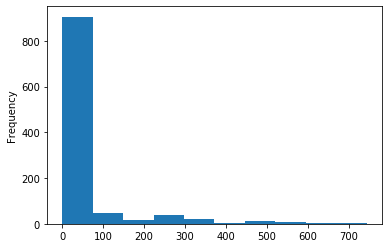

In [8]:
new_df.exch_usd.plot.hist()

I did a histogram of my predictor variable, exchange rate with US dollars, to determine if the variable is skewed. From the histogram, I can see that the predictor variable is skewed to the right.

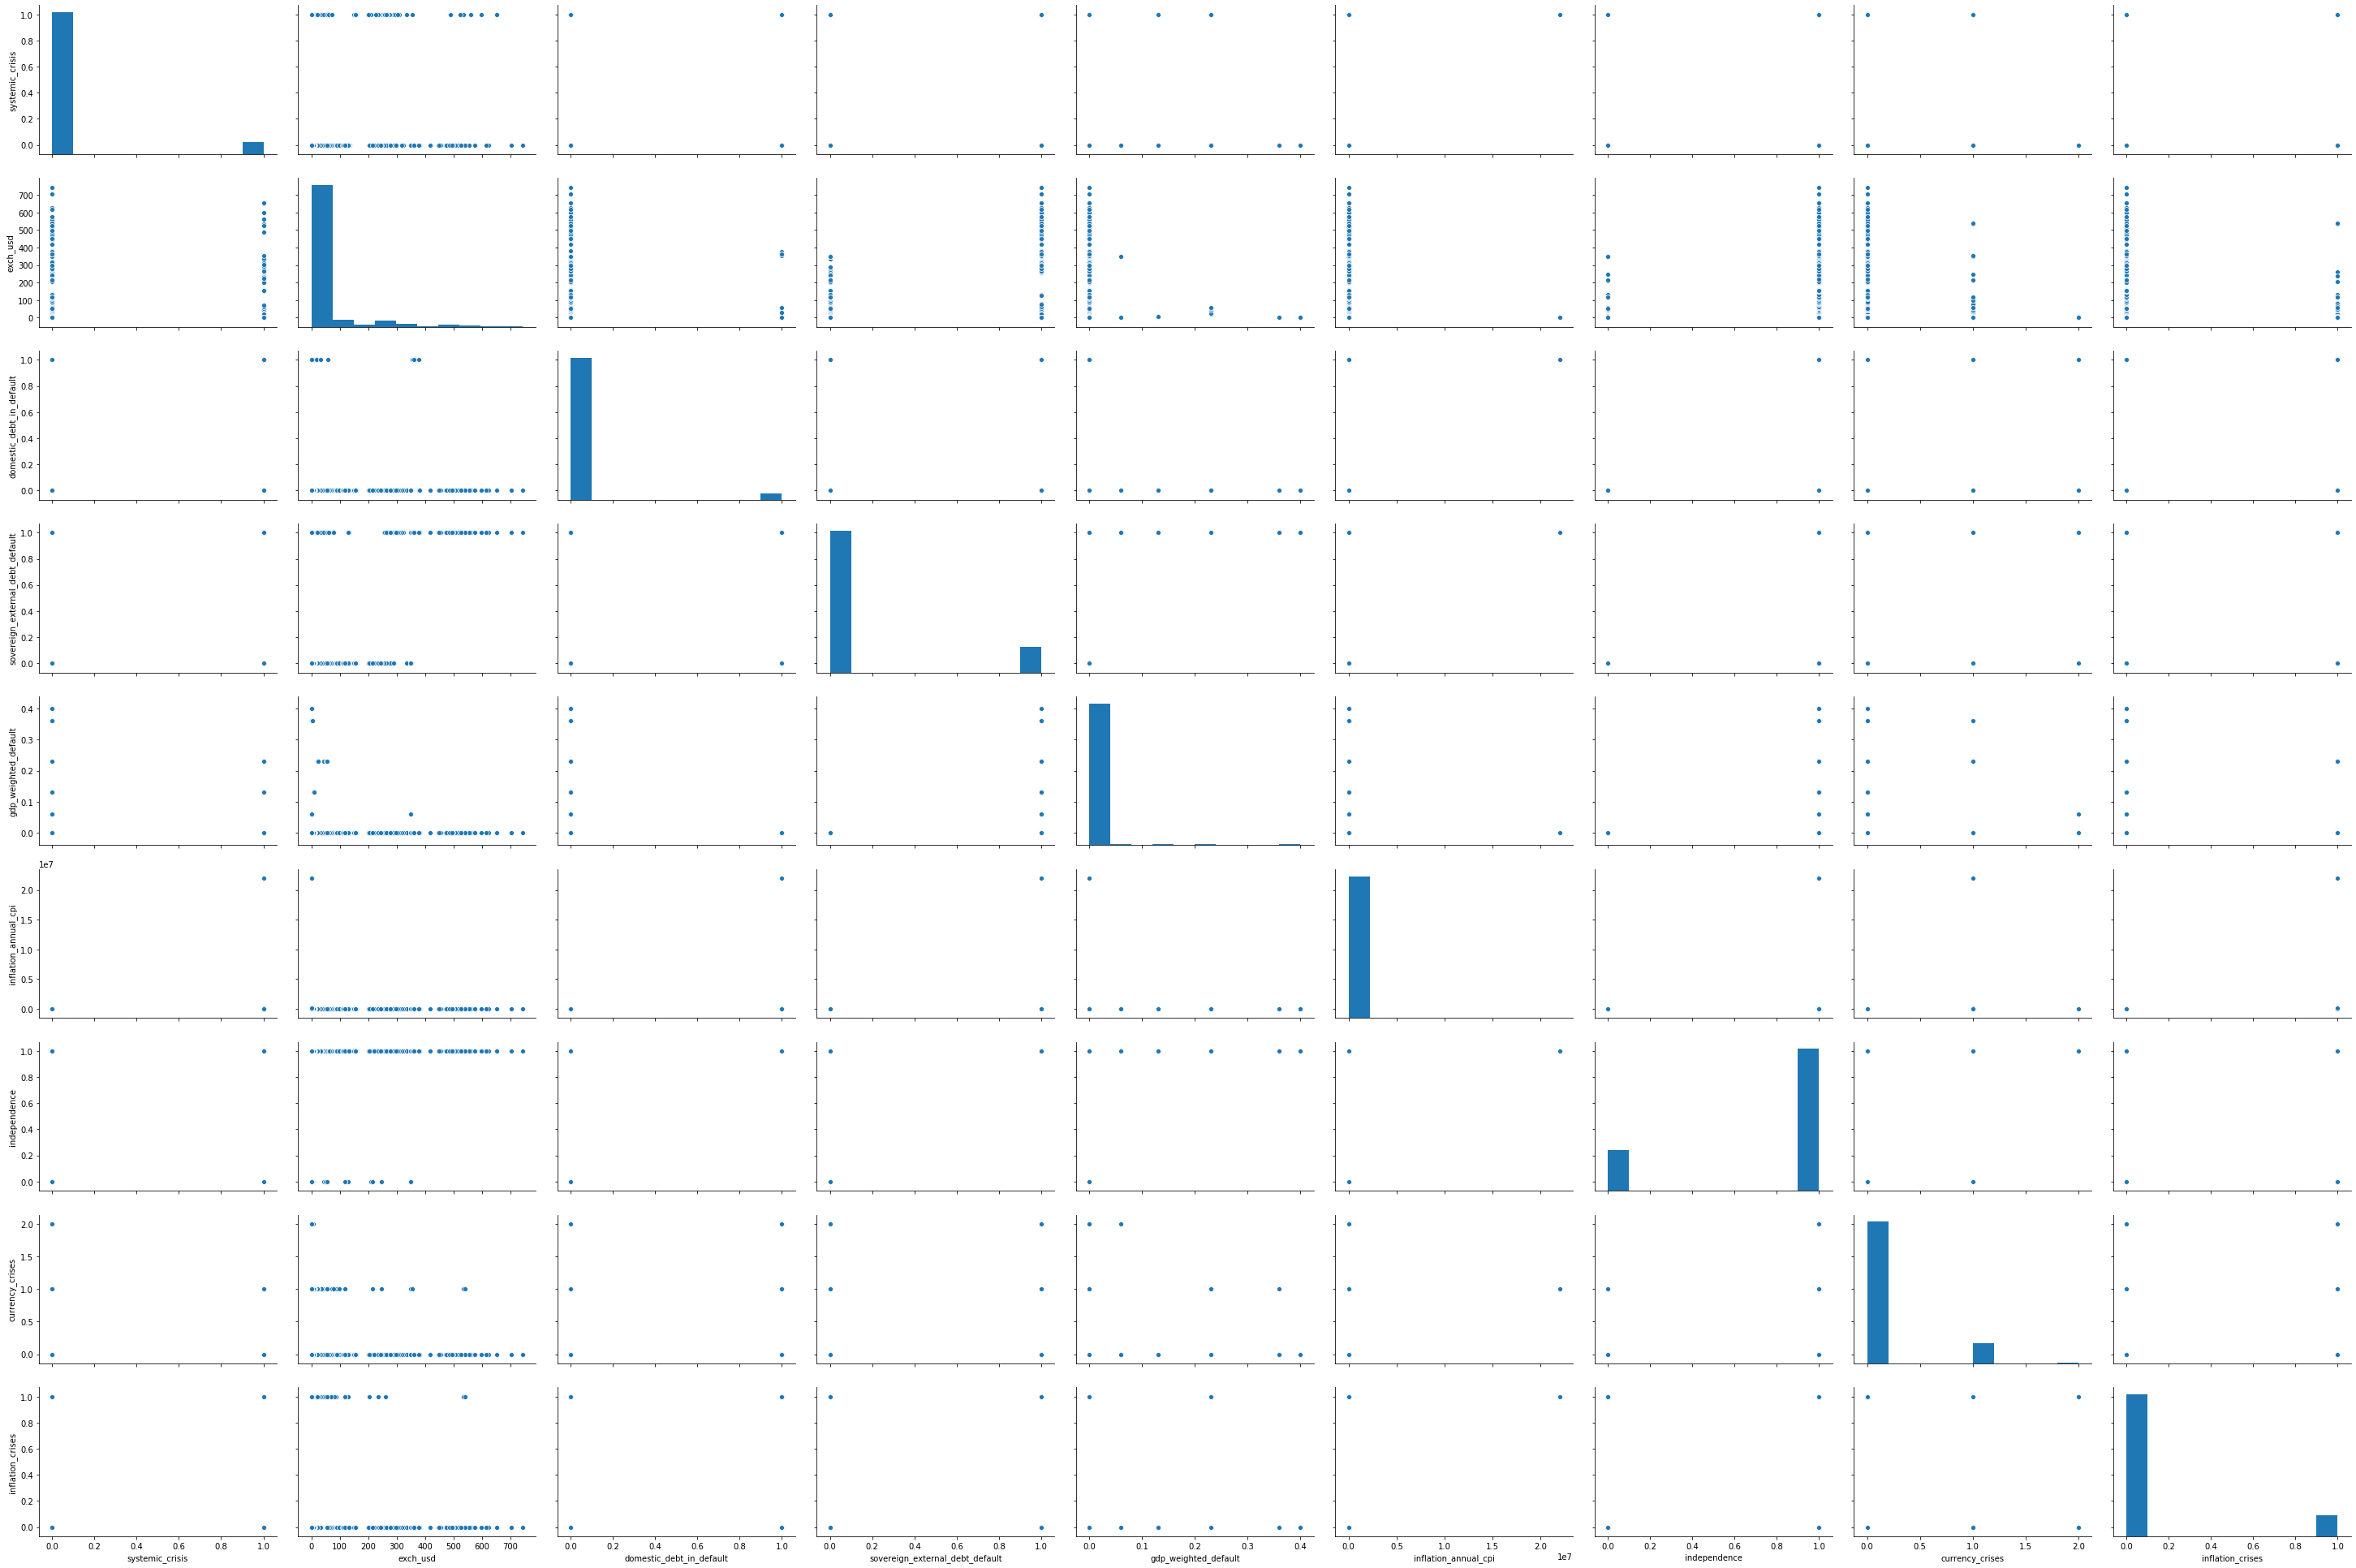

In [13]:
sns.pairplot(new_df, height = 3, aspect=1.5)

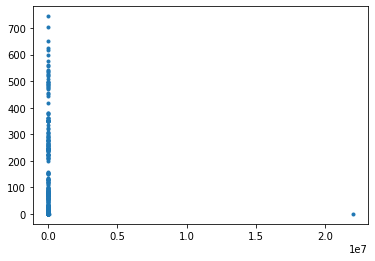

In [19]:
plt.plot(new_df['inflation_annual_cpi'], new_df['exch_usd'],'.')
#plt.xlim([0,2])